In [23]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
with open("../tracker_stubs/ball_detections.pkl", "rb") as f:
    ball_positions = pickle.load(f)

In [25]:
ball_positions = [x.get(1, []) for x in ball_positions]
# convert list into pd df
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])

#interpolate missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

ball_positions = [{1:x} for x in df_ball_positions.to_numpy().tolist()]


In [26]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5,min_periods=1,center=False).mean()

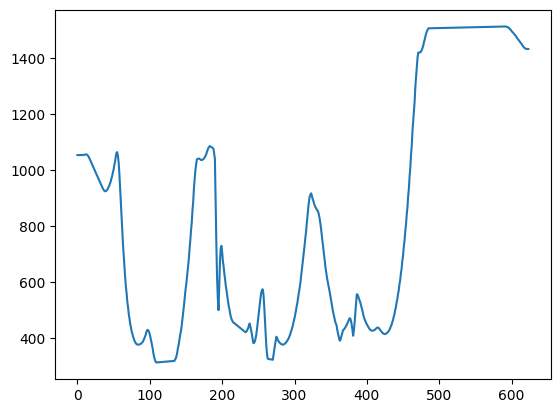

In [27]:
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [28]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

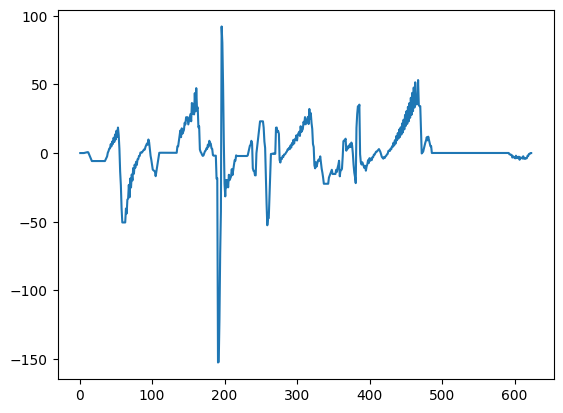

In [29]:
plt.plot(df_ball_positions['delta_y'])

In [30]:
df_ball_positions['ball_hit'] = 0
df_ball_positions['change_count'] = 0

In [31]:
minimum_change_frames_for_hit = 25
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit * 1.2)):
    negative_pos_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_pos_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0
    
    if negative_pos_change or positive_pos_change:
        change_count = 0
        
        for change_frame in range(i+1, i + int(minimum_change_frames_for_hit * 1.2)+1):
            negative_pos_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_pos_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0
            
            if negative_pos_change and negative_pos_change_following_frame:
                change_count += 1
            elif positive_pos_change and positive_pos_change_following_frame:
                change_count += 1
            
            if change_count > minimum_change_frames_for_hit - 1:
                print(change_count)
                df_ball_positions['ball_hit'].iloc[i] = 1
                df_ball_positions['change_count'].iloc[i] = change_count

25
26
26
26
26
26
25
26
27
28
28
28
25
26
27
28
29
30
25
26
25
26
27
28
29
30
25
26
27
28
29
30
25
26
27
28
29
30
25
25
26
27
28
29
30
25
26
27
28
29
30
25
26
27
28
29
29


/var/folders/rq/g_c54b_s01ng05xmwgddfg7w0000gn/T/ipykernel_52981/3927085468.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
/var/folders/rq/g_c54b_s01ng05xmwgddfg7w0000gn/T/ipykernel_52981/39270

In [32]:
#show ball positions where ball_hit 
df_ball_positions[df_ball_positions['ball_hit'] == 1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit,change_count
12,1631.971313,1037.659668,1674.586670,1075.944092,1056.801880,1055.951660,0.547424,1,26
55,1681.455960,1017.945353,1718.196669,1056.638360,1037.291857,1064.022519,3.062198,1,28
109,748.235094,299.526052,768.732117,323.904833,311.715442,311.296159,-3.221972,1,30
183,626.243355,1060.822937,665.222656,1103.655899,1082.239418,1085.682669,3.065230,1,26
199,1059.058594,644.378479,1096.477051,681.520447,662.949463,728.776184,8.325490,1,30
284,2139.739258,360.525635,2168.766602,389.123718,374.824677,375.219727,-0.517987,1,30
323,2163.724202,881.344076,2198.292155,916.042928,898.693502,916.496788,4.361570,1,30
376,876.257751,467.247223,905.376831,495.011292,481.129257,469.279651,5.537714,1,25
425,235.604324,402.107843,265.247177,429.698743,415.903293,412.527079,-0.642932,1,30
472,77.563774,1393.227661,126.747231,1448.236938,1420.732300,1420.312854,-0.296313,1,30
